In [ ]:
# pyplot_multiaxis.jl
#
#	Demonstrate use of multiple overlapping axes
#
# gizmaa (https://gist.github.com/gizmaa/7214002)
# Julia 0.6.0
# 19.12.13
# Last Edit: 20.07.17

using PyPlot

##################
#  Make Up Data  #
##################
n = 15 # Number of values

x = [1:n;]
y1 = 10rand(n,1) - 2
y2 = 1000rand(n,1)
y3 = 30rand(n,1) - 15

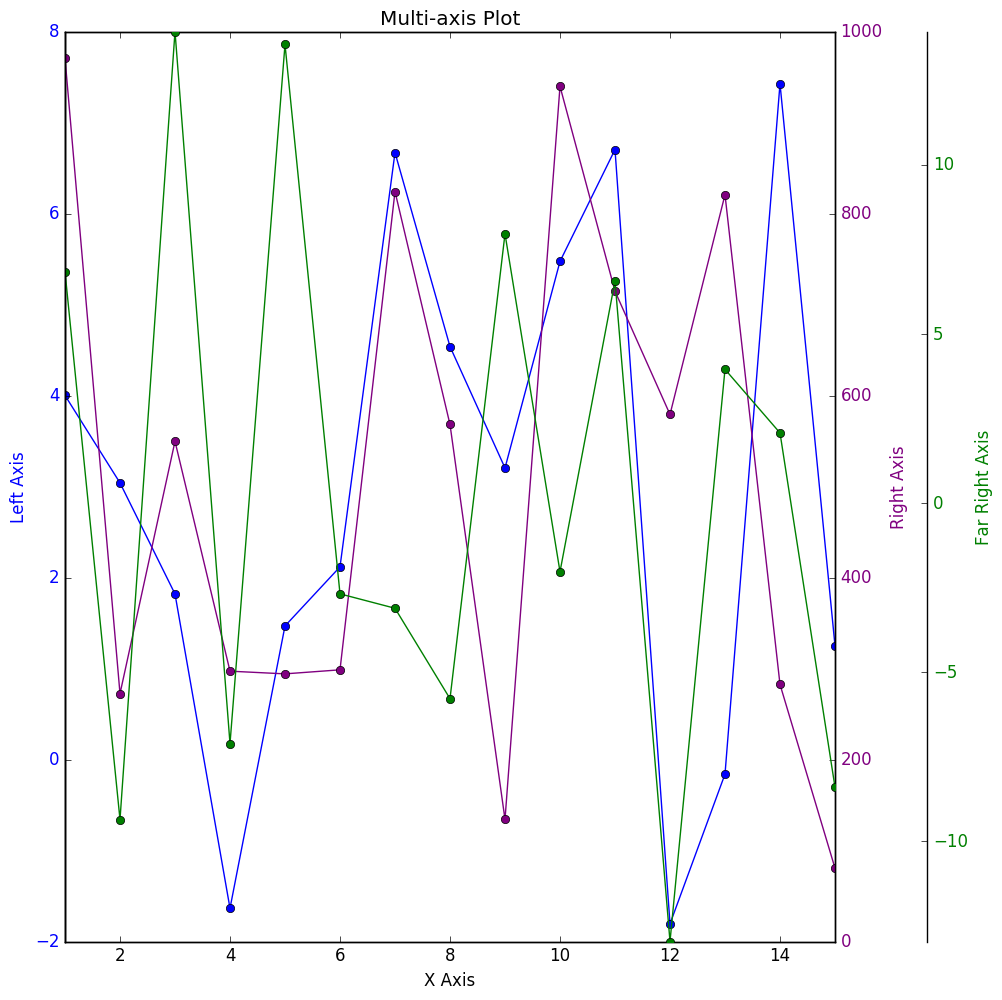

In [2]:
##########
#  Plot  #
##########
fig = figure("pyplot_multiaxis",figsize=(10,10))
p = plot(x,y1,linestyle="-",marker="o",label="First") # Plot a basic line
ax = gca()
title("Multi-axis Plot")

xlabel("X Axis")
font1 = Dict("color"=>"blue")
ylabel("Left Axis",fontdict=font1)
setp(ax[:get_yticklabels](),color="blue") # Y Axis font formatting

################
#  Other Axes  #
################
new_position = [0.06;0.06;0.77;0.91] # Position Method 2
ax[:set_position](new_position) # Position Method 2: Change the size and position of the axis
#fig[:subplots_adjust](right=0.85) # Position Method 1

ax2 = ax[:twinx]() # Create another axis on top of the current axis
font2 = Dict("color"=>"purple")
ylabel("Right Axis",fontdict=font2)
p = plot_date(x,y2,color="purple",linestyle="-",marker="o",label="Second") # Plot a basic line
ax2[:set_position](new_position) # Position Method 2
setp(ax2[:get_yticklabels](),color="purple") # Y Axis font formatting

ax3 = ax[:twinx]() # Create another axis on top of the current axis
ax3[:spines]["right"][:set_position](("axes",1.12)) # Offset the y-axis label from the axis itself so it doesn't overlap the second axis
font3 = Dict("color"=>"green")
ylabel("Far Right Axis",fontdict=font3)
p = plot_date(x,y3,color="green",linestyle="-",marker="o",label="Third") # Plot a basic line
ax3[:set_position](new_position) # Position Method 2
setp(ax3[:get_yticklabels](),color="green") # Y Axis font formatting

axis("tight")

# Enable just the right part of the frame
ax3[:set_frame_on](true) # Make the entire frame visible
ax3[:patch][:set_visible](false) # Make the patch (background) invisible so it doesn't cover up the other axes' plots
ax3[:spines]["top"][:set_visible](false) # Hide the top edge of the axis
ax3[:spines]["bottom"][:set_visible](false) # Hide the bottom edge of the axis

fig[:canvas][:draw]() # Update the figure
gcf() # Needed for IJulia to plot inline